Shopify Summer 2022 Data Science Intern Challenge Question 1

###### Analysis shown below
##### a) 
One issue with the dataset is the inclusion of multiple types of outliers that mess with the quality of data, especially when trying to report an average order value. The two types of outliers are orders coming from what we will call 'luxury' sneaker shops, who sell shoes well above 25,000 dollars, more than we would expect from a sneaker sale. The second type of outlier comes from what we will call 'bulk sellers', who sell shoes in quantities of 2000 pairs, greatly inflating the average order value. To eliminate the impact of these outliers on the average order value, we can segment the data into subsets that will better report what we are looking for. We can use histograms to find clear divisions between the outliers and most of the data to determine where to segment the data. Our results show that luxury shoe sales have an AOV of 49,213 dollars. Then, the non-luxury sales can be segmented into bulk orders at an average of 704,000 dollars and individual non-luxury orders averaging an AOV of 303 dollars.
#####b)
The metric I would report instead would be the average item price alongside the number of items ordered. This way, we could include the bulk orders into the average item price without having a skewed result, and we could include the luxury items into the number of items ordered without having an inaccurate result.
#####c)
We see that the average cost of a non-luxurious sneaker is around 152 dollars, and the average number of shoes bought not in bulk is around 2 pairs.

In [9]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt


First, let's import the data in as a DataFrame

In [5]:
df = pd.read_csv('/content/2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv')
df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


Let's figure out the ranges of the 'order_amount' column. We can change the scale of the histogram to really see where we have outliers that are messing with our data

In [8]:
df['order_amount'].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

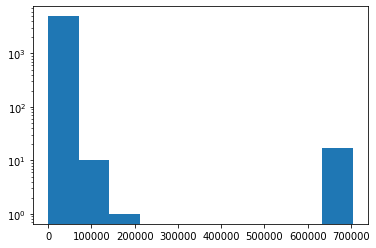

In [14]:
plt.hist(df['order_amount'])
plt.yscale('log')

When looking at the data, we see that some of these outlier order amounts are because the buyer is ordering lots of items. Perhaps they are a retailer buying at wholesale amounts. Let's create a new column, 'amount_per_item' to see how expensive the average shoe costs, so we can check for outliers that do not reflect an increased quantity of shoes.

In [7]:
df['amount_per_item'] = df['order_amount']/df['total_items']
df['amount_per_item'].describe()

count     5000.000000
mean       387.742800
std       2441.963725
min         90.000000
25%        133.000000
50%        153.000000
75%        169.000000
max      25725.000000
Name: amount_per_item, dtype: float64

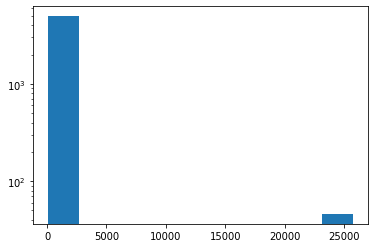

In [15]:
plt.hist(df['amount_per_item'])
plt.yscale('log')

We see that there some sneakers that still cost well over what we would expect. Perhaps these are some luxury shoes, sold by specific stores. We should segment the data to reflect this. We can split it into DataFrames with 'amount_per_item' greater and lesser than $5,000.

In [21]:
luxury_sneakers = df[df['amount_per_item'] > 5000]
non_luxury_sneakers = df[df['amount_per_item'] <= 5000]

In [22]:
luxury_sneakers

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57,25725.0
490,491,78,936,51450,2,debit,2017-03-26 17:08:19,25725.0
493,494,78,983,51450,2,cash,2017-03-16 21:39:35,25725.0
511,512,78,967,51450,2,cash,2017-03-09 7:23:14,25725.0
617,618,78,760,51450,2,cash,2017-03-18 11:18:42,25725.0
691,692,78,878,154350,6,debit,2017-03-27 22:51:43,25725.0
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45,25725.0
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26,25725.0
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21,25725.0
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20,25725.0


In [24]:
luxury_sneakers['order_amount'].describe()

count        46.000000
mean      49213.043478
std       26472.227449
min       25725.000000
25%       25725.000000
50%       51450.000000
75%       51450.000000
max      154350.000000
Name: order_amount, dtype: float64

In [23]:
non_luxury_sneakers

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


We see that there is one store selling these luxury sneakers that is driving up the average price. We can exclude that for our data, but we can see that there are 46 sales of sneakers at an average of $49,213 spent per order.

Another issue that could be negatively affected the average order value is the non-seperation of bulk orders (presumably by businesses) and individual orders (which is more useful to us). Let's segment the data from non luxury shoes to better focus on each bulk and individual orders seperately.

Let's segment the orders by 'total_items'. We can split it into DataFrames with orders with more and less than 500 items.

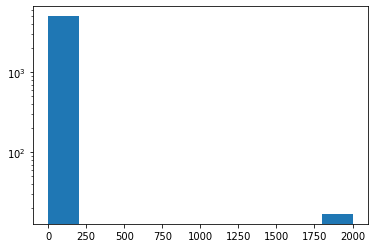

In [16]:
plt.hist(df['total_items'])
plt.yscale('log')

In [31]:
bulk_orders = non_luxury_sneakers[non_luxury_sneakers['total_items'] > 500]
individual_orders = non_luxury_sneakers[non_luxury_sneakers['total_items'] <= 500]

In [32]:
bulk_orders

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00,352.0
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00,352.0
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00,352.0
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00,352.0
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00,352.0
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00,352.0
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00,352.0
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00,352.0
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00,352.0


In [33]:
individual_orders

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at,amount_per_item
0,1,53,746,224,2,cash,2017-03-13 12:36:56,112.0
1,2,92,925,90,1,cash,2017-03-03 17:38:52,90.0
2,3,44,861,144,1,cash,2017-03-14 4:23:56,144.0
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37,156.0
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11,156.0
...,...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17,165.0
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16,117.0
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42,117.0
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18,177.0


In [34]:
individual_orders['order_amount'].describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

(array([2.088e+03, 1.821e+03, 7.790e+02, 1.840e+02, 4.900e+01, 1.300e+01,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  90.,  257.,  424.,  591.,  758.,  925., 1092., 1259., 1426.,
        1593., 1760.]),
 <a list of 10 Patch objects>)

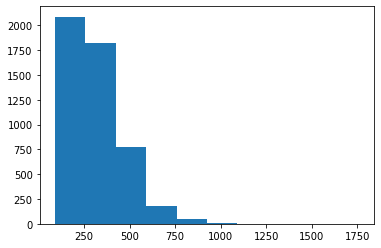

In [35]:
plt.hist(individual_orders['order_amount'])

We can now see that for our bulk orders, the average order volume is 2,000 shoes totalling $704,000 over 17 orders. We see that the same user is buying from the same shop, suggesting that it may be a retailer.

From our individual orders, we see a mean order amount of $303. That's more like what we would expect.

Part B/C
Calculating the average item value (non-luxurious)

In [36]:
non_luxury_sneakers['amount_per_item'].describe()

count    4954.000000
mean      152.475575
std        31.260218
min        90.000000
25%       132.000000
50%       153.000000
75%       168.000000
max       352.000000
Name: amount_per_item, dtype: float64

Calculating the average order size (not including bulk)

In [38]:
total_individual_orders = df[df['total_items'] <= 500]
total_individual_orders['total_items'].describe()

count    4983.00000
mean        1.99398
std         0.98318
min         1.00000
25%         1.00000
50%         2.00000
75%         3.00000
max         8.00000
Name: total_items, dtype: float64